In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
from math import floor
from scipy.integrate import solve_ivp

from mentevo.utils import gaussian_g_vector, build_forward_matrix, build_cue_vector
from mentevo.experiment import Experiment

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


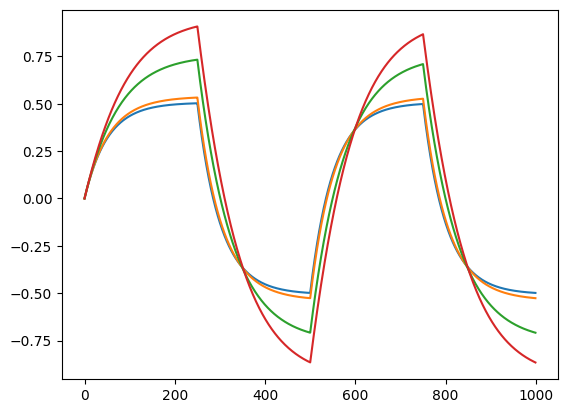

In [12]:
import matplotlib.pyplot as plt

experiment = Experiment(number_of_agents=4,
                 number_of_tasks=2,
                 communication_graph=None,
                 task_graph=None,
                 alpha=0.03,
                 beta=0.01,
                 gamma=0.02,
                 delta=0.0,
                 d=0.2,
                 tau=10.0,
                 g=np.array([0.1, 0.5, 3.0, 5.0]),
                 bias_value=0.1,
                 initial_state=None,
                 total_time=1_000,
                 number_of_switches=4,
                 number_of_informed=None)
zs = experiment.solve()

curves = zs
#curves = [(curves[0] - curves[1]) / 2.0, (curves[2] - curves[3]) / 2.0]
curves = [(curves[i*2] - curves[i*2+1]) / 2.0 for i in range(4)]
for i in range(4):
  plt.plot(curves[i])

<Figure size 300x300 with 0 Axes>

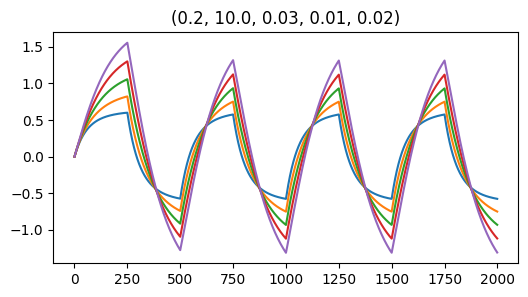

In [13]:
import matplotlib.pyplot as plt

def set_size(w, h):
  plt.figure(figsize=(w, h))

set_size(3, 3)
for d in [0.2]:
  for tau in [10.0]:
    for alpha in [0.03]:
      for beta in [0.01]:
        for gamma in [0.02]:
          gs = np.array([1.0, 3.0, 5.0, 7.0, 9.0])
          experiment = Experiment(number_of_agents=5,
                          number_of_tasks=2,
                          communication_graph=None,
                          task_graph=None,
                          alpha=alpha,
                          beta=beta,
                          gamma=gamma,
                          delta=0.0,
                          d=d,
                          tau=tau,
                          g=gs,
                          bias_value=0.1,
                          initial_state=None,
                          total_time=2_000,
                          number_of_switches=8,
                          number_of_informed=None)
          zs = experiment.solve()

          set_size(6, 3)
          curves = zs
          curves = [(curves[i*2] - curves[i*2+1]) / 2.0 for i in range(5)]
          for i in range(5):
            plt.plot(curves[i])
          plt.title((d, tau, alpha, beta, gamma))
          plt.show()

# alpha beta gamma 1.0, 0.5, 0.1

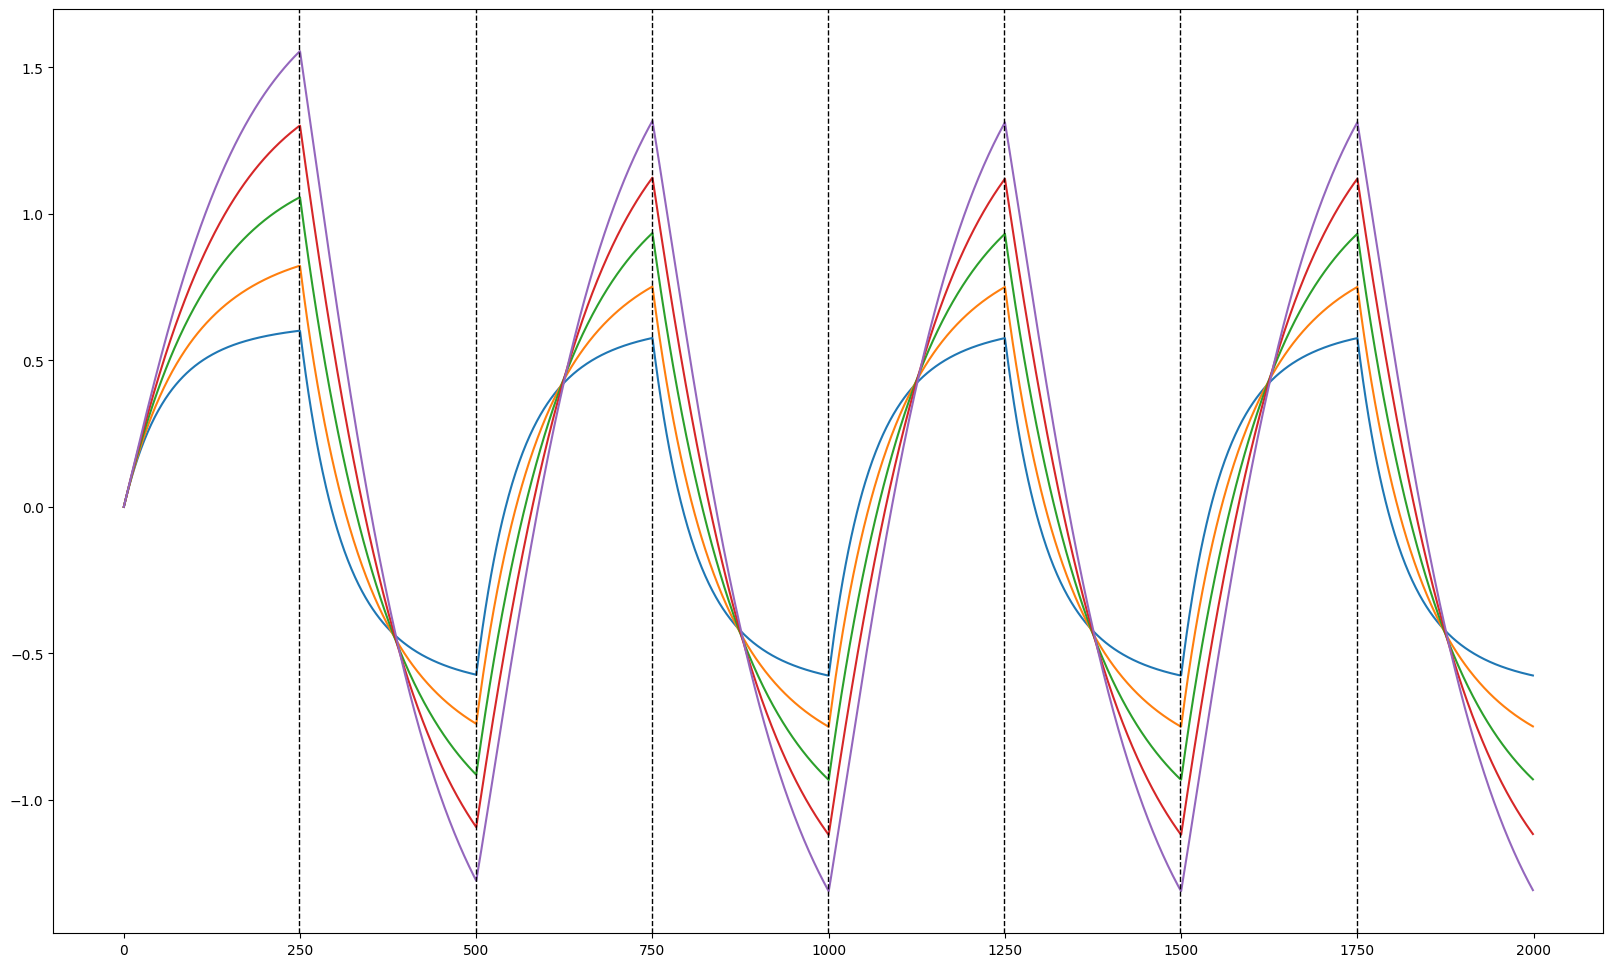

In [37]:
from mentevo.plots import plot_curves
set_size(20, 12)

plot_curves(experiment, zs)

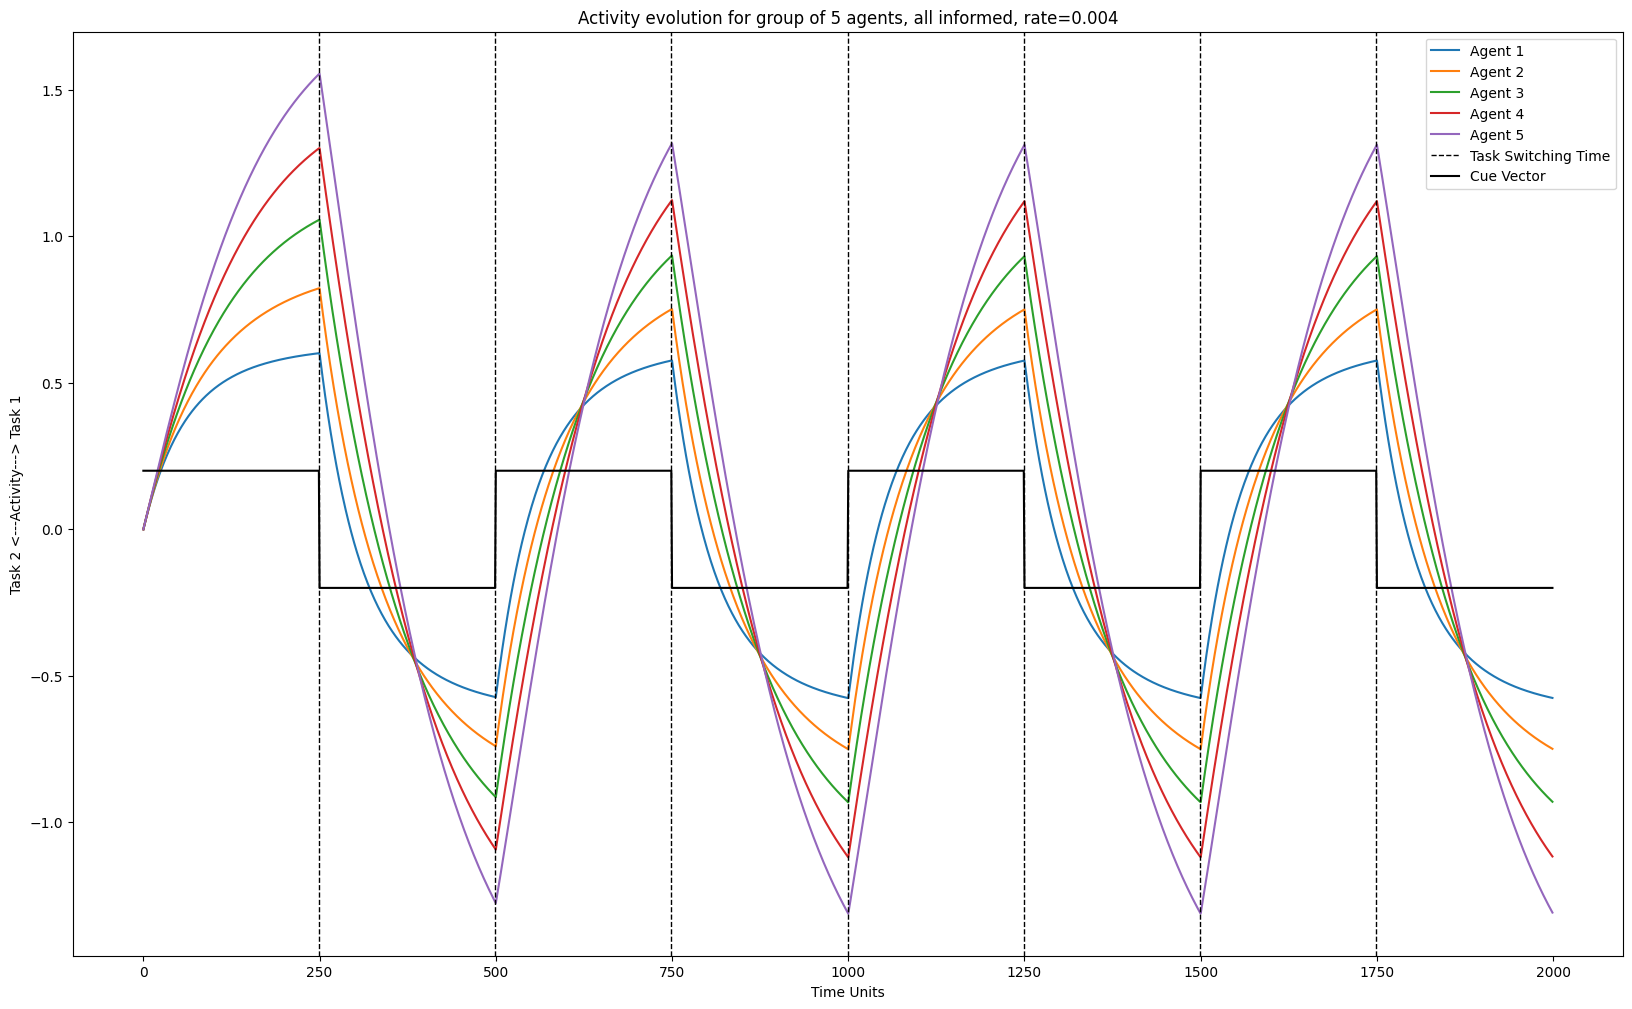

In [44]:
set_size(20, 12)
plot_curves(experiment, 
            zs, 
            'Activity evolution for group of 5 agents, all informed, rate=0.004',
            'Time Units',
            'Task 2 <---Activity---> Task 1',
            None,
            True,
            'inside',
            10,
            True,
            1,
            'black',
            '--',
            show_cue_vector=True,
            )

plt.show()

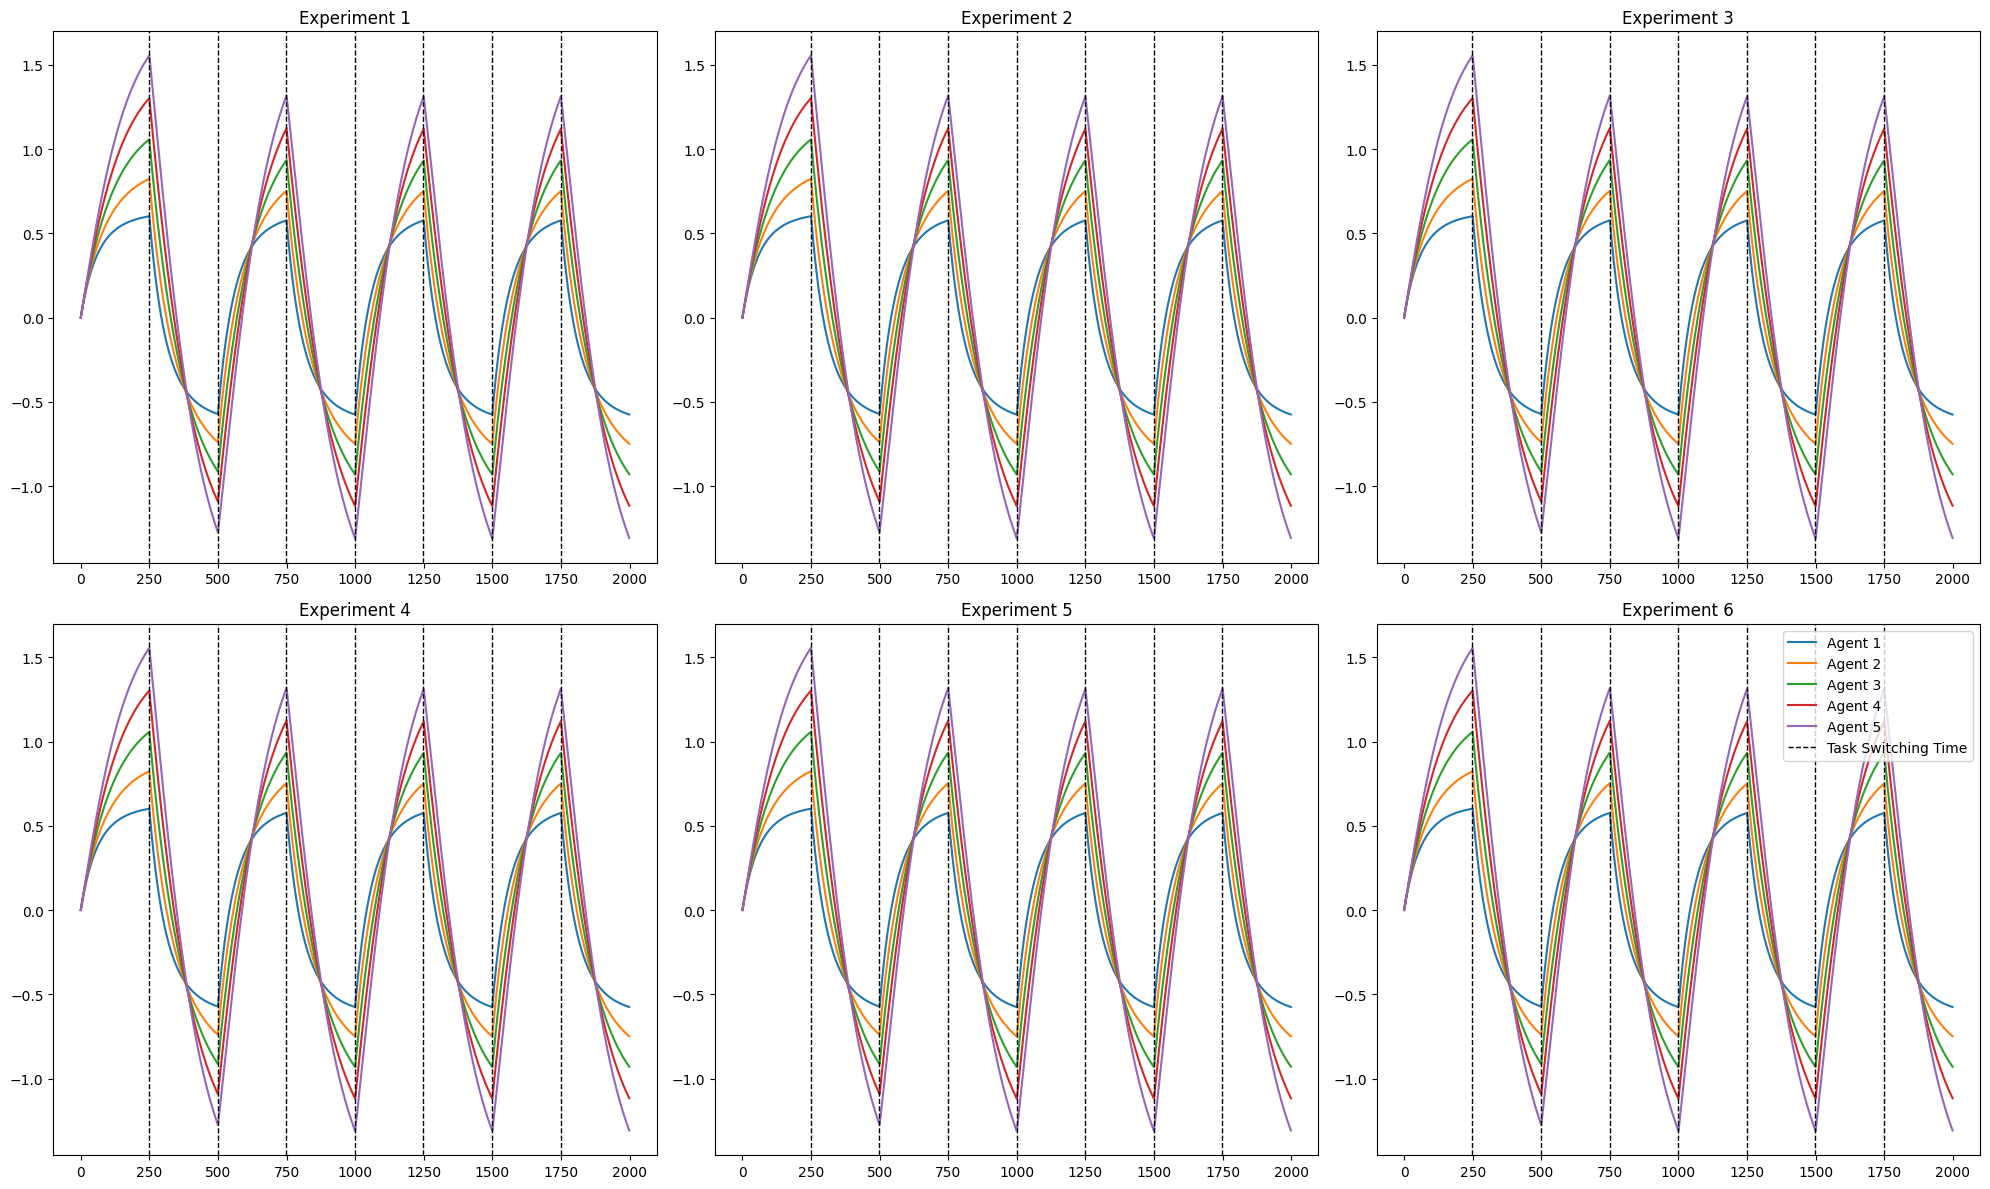

In [45]:
from mentevo.plots import plot_curves
set_size(20, 12)
curves = zs

for i in range(6):
    plt.subplot(2, 3, i+1)
    plot_curves(experiment, curves)
    plt.title(f"Experiment {i+1}")
plt.tight_layout()
plt.legend()
plt.show()